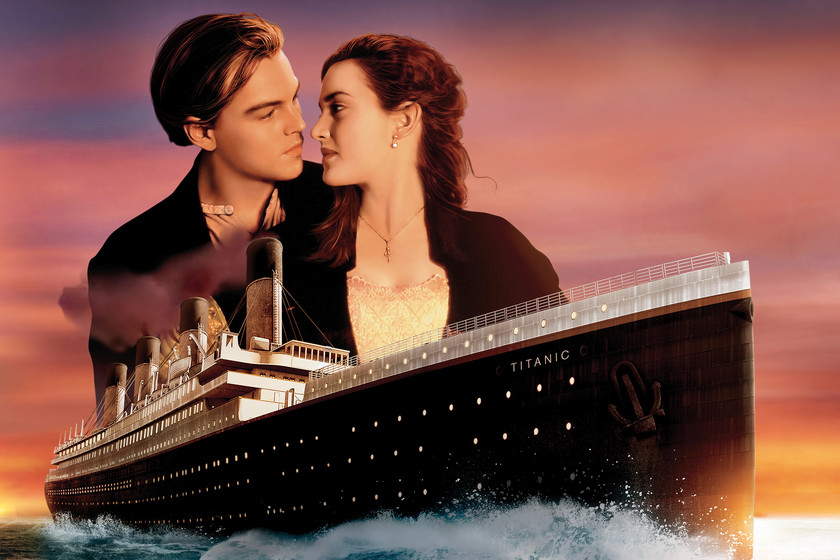

## Agrupar los pasajeros del Titanic por género y contar el número de sobrevivientes en cada grupo:

In [ ]:
import pandas as pd

titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Agrupar por género y sumar la columna 'Survived'
grouped = titanic_df.groupby('Sex')['Survived'].sum()

In [ ]:
grouped

Sex
female    233
male      109
Name: Survived, dtype: int64

## Calcular la edad promedio de los pasajeros del Titanic por clase:

In [ ]:
# Agrupar por clase y calcular la media de la columna 'Age'
grouped = titanic_df.groupby('Pclass')['Age'].mean()

In [ ]:
grouped

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

## Contar el número de pasajeros en cada categoría de edad:

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Agrupar por categoría de edad y contar el número de pasajeros
grouped = titanic_df.groupby('Age')['PassengerId'].count()

print(grouped)
#está mal? está bien ? se entiende ? que podríamos hacer

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: PassengerId, Length: 88, dtype: int64


In [ ]:
# Agrupar por rango de edad
age_ranges = pd.cut(titanic_df['Age'], bins=[0, 18, 30, 50, 100])

age_ranges

0      (18.0, 30.0]
1      (30.0, 50.0]
2      (18.0, 30.0]
3      (30.0, 50.0]
4      (30.0, 50.0]
           ...     
886    (18.0, 30.0]
887    (18.0, 30.0]
888             NaN
889    (18.0, 30.0]
890    (30.0, 50.0]
Name: Age, Length: 891, dtype: category
Categories (4, interval[int64, right]): [(0, 18] < (18, 30] < (30, 50] < (50, 100]]

In [ ]:
# Contar la cantidad de registros por rango
counts = titanic_df.groupby(age_ranges).size()

In [ ]:
counts

Age
(0, 18]      139
(18, 30]     270
(30, 50]     241
(50, 100]     64
dtype: int64

Este código agrupa los registros por rango de edad, donde los rangos son: 0-18, 18-30, 30-50, y 50-100. Luego, utiliza un groupby para contar la cantidad de registros por cada rango de edad.

## Contar el número de pasajeros que sobrevivieron y murieron en cada clase del Titanic:

In [ ]:
# Agrupar por clase y sobrevivientes y contar el número de pasajeros
grouped = titanic_df.groupby(['Pclass', 'Survived']).size()

In [ ]:
grouped

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

## Estudiantes

Para calcular el promedio de notas de cada estudiante en cada materia a lo largo de los meses, podemos hacer lo siguiente:

In [ ]:
# Crear DataFrame de ejemplo
import pandas as pd
import numpy as np

np.random.seed(123)
data = {'Estudiante': ['Ana', 'Ana', 'Ana', 'Juan', 'Juan', 'Juan','Ana', 'Ana', 'Ana', 'Juan', 'Juan', 'Juan'],
        'Materia': ['Matemáticas', 'Ciencias', 'Historia', 'Matemáticas', 'Ciencias', 'Historia','Matemáticas', 'Ciencias', 'Historia', 'Matemáticas', 'Ciencias', 'Historia'],
        'mes': ['Abril', 'Mayo', 'Junio', 'Abril', 'Mayo', 'Junio','Julio', 'Agosto', 'Septiembre', 'Julio', 'Agosto', 'Septiembre'],
        'nota': np.random.randint(1, 11, size=12)}
df = pd.DataFrame(data)

In [ ]:
df.sort_values(by="Estudiante")

,Estudiante,Materia,mes,nota
0,Ana,Matemáticas,Abril,3
1,Ana,Ciencias,Mayo,3
2,Ana,Historia,Junio,7
6,Ana,Matemáticas,Julio,7
7,Ana,Ciencias,Agosto,2
8,Ana,Historia,Septiembre,1
3,Juan,Matemáticas,Abril,2
4,Juan,Ciencias,Mayo,4
5,Juan,Historia,Junio,10
9,Juan,Matemáticas,Julio,2


In [ ]:
# Calcular el promedio de notas de cada estudiante en cada materia a lo largo de los meses
df.groupby(['Estudiante', 'Materia'])['nota'].mean()

Estudiante  Materia    
Ana         Ciencias       2.5
            Historia       4.0
            Matemáticas    5.0
Juan        Ciencias       7.0
            Historia       5.5
            Matemáticas    2.0
Name: nota, dtype: float64

In [ ]:
#Reseteamos el índice
df.groupby(['Estudiante', 'Materia'])['nota'].mean().reset_index()

,Estudiante,Materia,nota
0,Ana,Ciencias,2.5
1,Ana,Historia,4.0
2,Ana,Matemáticas,5.0
3,Juan,Ciencias,7.0
4,Juan,Historia,5.5
5,Juan,Matemáticas,2.0


# **Mapping**

## Mapear los valores de la columna 'Sex' a valores binarios

In [ ]:
import pandas as pd

titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [ ]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

titanic_df["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

Convertir valores de una columna de texto a valores numéricos. Por ejemplo, para convertir las calificaciones de A, B, C, D y F en 4, 3, 2, 1 y 0, respectivamente:

In [ ]:
import pandas as pd

# Crear DataFrame a partir de un diccionario
df = pd.DataFrame({'calificación': ['A', 'B', 'C', 'D', 'F']})

df

,calificación
0,A
1,B
2,C
3,D
4,F


In [ ]:
# Mapear los valores de la columna 'calificación'
mapeo = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}

In [ ]:
df['calificación_num'] = df['calificación'].map(mapeo)
df

,calificación,calificación_num
0,A,4
1,B,3
2,C,2
3,D,1
4,F,0


Convertir valores de una columna de fechas en el nombre del mes correspondiente. Por ejemplo, para convertir fechas del formato 'YYYY-MM-DD' al nombre del mes:

In [ ]:
import pandas as pd

# Crear DataFrame a partir de un diccionario
df = pd.DataFrame({'fecha': ['2022-01-01', '2022-02-15', '2022-03-20', '2022-04-05']})


In [ ]:
# Mapear los valores de la columna 'fecha'
mapeo = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio',
         8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

In [ ]:
df['mes'] = pd.to_datetime(df['fecha']).dt.month.map(mapeo)

df

,fecha,mes
0,2022-01-01,Enero
1,2022-02-15,Febrero
2,2022-03-20,Marzo
3,2022-04-05,Abril


Convertir valores de una columna de unidades de medida en valores estándar. Por ejemplo, para convertir los valores de la columna 'peso' de libras a kilogramos:

In [ ]:
import pandas as pd

# Crear DataFrame a partir de un diccionario
df = pd.DataFrame({'peso': [150, 180, 200], 'unidad': ['libras', 'libras', 'libras']})

# Mapear los valores de la columna 'unidad'
mapeo = {'libras': 0.453592}
df['peso_kg'] = df['peso'] * df['unidad'].map(mapeo)

print(df)

   peso  unidad   peso_kg
0   150  libras  68.03880
1   180  libras  81.64656
2   200  libras  90.71840


## Gapminder

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')

data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [ ]:
color_map = {'Africa': 'blue',
             'Americas': 'green',
             'Asia': 'red',
             'Europe': 'purple',
             'Oceania': 'orange'}

In [ ]:
data['color'] = data['continent'].map(color_map)

In [ ]:
data.head()

,country,year,pop,continent,lifeExp,gdpPercap,color
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,red
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,red
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,red
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,red
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,red


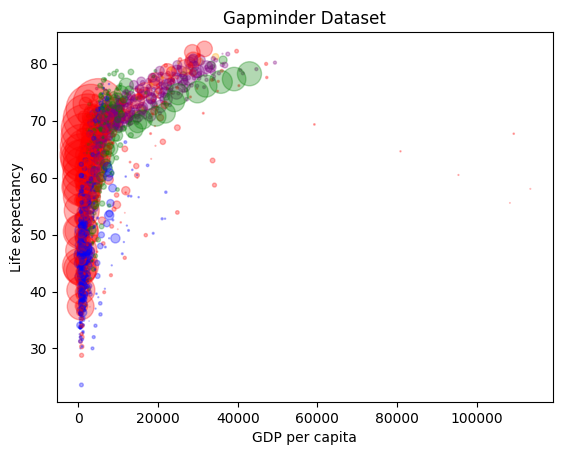

In [ ]:
plt.scatter(data['gdpPercap'], data['lifeExp'], s=data['pop']/1000000, c=data['color'], alpha=0.3)
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.title('Gapminder Dataset')
plt.show()